# 03_naive_bayes.ipynb

We will use the train/test data generated from *00_create_dataset.ipynb* and perform basic **MODEL_TYPE**

In [2]:
''' data and math '''
import pandas as pd
import numpy as np

''' plotting images '''
from matplotlib import pyplot as plt
%matplotlib inline

''' traversing directories '''
import os
from pathlib import Path

''' utilities '''
from tqdm import tqdm

''' machine learning '''
from sklearn import tree

In [3]:
''' used to reference the root directory, for directory traversal ''' 
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
mount_dir = '/content/gdrive'
root_dir = Path('/content/gdrive/My Drive/it3011_project')

Mounted at /content/gdrive


# Helper functions

In [4]:
# create the utility score, which takes in the prediction value and the ground truth action and generates a score
# link: https://www.kaggle.com/c/jane-street-market-prediction/overview/evaluation

# data: original train/test data    action: the y-value. can either be y_pred or original values too, if we want the max score attainable
def utility_score(data, action): 
  dates_set = set(data.date.values)
  dates = data.loc[:, ['date']].values.flatten()
  weights = data.loc[:, ['weight']].values.flatten()
  resps = data.loc[:, ['resp']].values.flatten()
  actions = action.flatten()

  i = len(dates_set)
  p_i = []

  for date in dates_set:
    indices = np.where(dates == date)[0]
    p_i_temp = 0
    for j in indices:
      p_i_temp = p_i_temp + weights[j] * resps[j] * actions[j]
    p_i.append(p_i_temp)
  
  p_i_squared = [p_i1*p_i2 for p_i1,p_i2 in zip(p_i,p_i)]
  t = ( sum(p_i) / np.sqrt(sum(p_i_squared)) ) * np.sqrt(250/i)
  u = min(max(t, 0), 6) * sum(p_i)

  return u

def max_train_utility_score():
  # value obtained from notebook 01_dataset_understanding.ipynb
  max_achievable_train_utility = 38666.152212179244
  return max_achievable_train_utility

def max_test_utility_score():
  # value obtained from notebook 01_dataset_understanding.ipynb
  max_achievable_test_utility = 15405.02761054398
  return max_achievable_test_utility

# Loading data

In [5]:
# load data
train = pd.read_csv(root_dir/"data/train.csv")
test = pd.read_csv(root_dir/"data/test.csv")
print("data loaded")

data loaded


In [6]:
# check shape
print(train.shape)
print(test.shape)

(280145, 139)
(120504, 139)


In [7]:
# create train/test sets
features = [feature for feature in test.keys() if "feature" in feature]
x_train = train.loc[:, features].values
y_train = train.loc[:,['action']].values
x_test = test.loc[:, features].values
y_test = test.loc[:,['action']].values
print("train/test set created")

train/test set created


# Model

In [8]:
dt = tree.DecisionTreeClassifier(max_depth = 5)
model = dt.fit(x_train, y_train.ravel())

preds = model.predict(x_test)
print("Number of mislabeled points out of a total %d points : %d" % (x_test.shape[0], (y_test.ravel() != preds).sum()))
print("Classification accuracy: {}".format((preds == y_test.ravel()).mean()))

Number of mislabeled points out of a total 120504 points : 59893
Classification accuracy: 0.5029791542189471


Decision tree sucks too. Let's plot the tree to see how it is...

[Text(156.57672413793102, 199.32, 'X[37] <= -1.55\ngini = 0.5\nsamples = 280145\nvalue = [137224, 142921]'),
 Text(70.71206896551723, 163.07999999999998, 'X[41] <= -0.16\ngini = 0.496\nsamples = 74099\nvalue = [33899, 40200]'),
 Text(37.52068965517241, 126.83999999999999, 'X[45] <= 10.292\ngini = 0.5\nsamples = 33815\nvalue = [16421, 17394]'),
 Text(23.089655172413792, 90.6, 'X[61] <= -2.351\ngini = 0.499\nsamples = 33705\nvalue = [16312, 17393]'),
 Text(11.544827586206896, 54.359999999999985, 'X[55] <= 1.777\ngini = 0.445\nsamples = 639\nvalue = [425, 214]'),
 Text(5.772413793103448, 18.119999999999976, 'gini = 0.497\nsamples = 393\nvalue = [211, 182]'),
 Text(17.317241379310346, 18.119999999999976, 'gini = 0.226\nsamples = 246\nvalue = [214, 32]'),
 Text(34.63448275862069, 54.359999999999985, 'X[5] <= -7.643\ngini = 0.499\nsamples = 33066\nvalue = [15887, 17179]'),
 Text(28.86206896551724, 18.119999999999976, 'gini = 0.351\nsamples = 233\nvalue = [180, 53]'),
 Text(40.40689655172414,

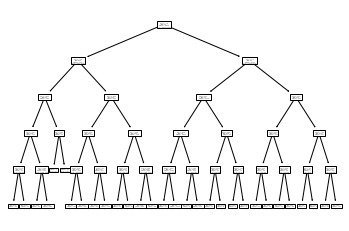

In [9]:
tree.plot_tree(model)

OK, what even. I'm done here.